In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
import pickle

In [3]:
# Load the dataset
dataset_path = "Processed_BookData.csv"
df = pd.read_csv(dataset_path)
df.head()

,book_authors,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres
0,A. Rose,163,4.25,143,19,Imitatore (The Donna Chronicles #1),"Adult,Adventure,Fantasy,Young Adult"
1,A. Bates,201,3.54,520,29,Final Exam,"Fiction,Horror,Teen,Thriller,Young Adult"
2,A. Cort Sinnes,127,4.50,2,1,In Your Own Backyard: How to Create and Enjoy ...,"Environment,Gardening,Nature"
3,A. Drew,144,4.86,7,5,BARBATUS,"Paranormal Romance,Romance"
4,A. Drew,113,4.33,24,21,The Dowling House,"Fantasy,Fiction,Horror,Paranormal"


In [4]:
genreList = set()
for index,row in df.iterrows():
    genres = row['genres'].split(",")
    for genre in genres:
        genreList.add(genre)
print(genreList)
print(len(genreList))

{'Roman', 'Epic Fantasy', 'Movies', '10th Century', 'Banned Books', 'Literary Criticism', 'Belgian', 'Emergency Services', 'Historical Fiction', 'Memoir', 'Prehistoric', 'Rock N Roll', 'Cozy Mystery', 'Own', 'High Fantasy', 'Writing', 'Software', 'Mine', 'Design', 'Japanese History', 'Christian Romance', 'Ghost Stories', 'Wizards', 'Mathematics', 'Vampires', 'Lesbian Romance', 'Family Law', 'Mmorpg', 'Cities', 'American', 'Fantasy', 'Asexual', 'Loveswept', 'Canon', 'Queer', 'Roman Britain', 'Food', 'Love Inspired', 'Retellings', 'Asia', 'Pulp', 'Video Games', 'Sweden', 'Travelogue', 'Graphic Novels', 'Poland', 'Splatterpunk', 'Animals', 'Bdsm', 'Paganism', 'World Of Warcraft', 'Hugo Awards', 'World War I', 'World Of Darkness', 'Science Fiction Romance', 'History Of Science', 'Fairy Tales', 'Arthurian', 'Ecclesiology', 'Cultural', 'Philosophy', 'Lds', 'Legal Thriller', 'Family', 'Spain', 'Hungarian Literature', 'Botswana', 'Mythology', 'True Crime', 'International Relations', 'Psychoana

In [5]:
# write the sample graph to use in other modules
def writeGraph(graph,name):
    with open(name,'wb') as f:
        pickle.dump(graph, f, pickle.HIGHEST_PROTOCOL)


In [6]:
# 1% sample for testing
random.seed(74)  # for reproducibility
selected_rows = random.sample(range(len(df)), int(0.01 * len(df)))
df_1_sample = df.iloc[selected_rows]

In [7]:
df_1_sample['genres']

33769                                Family,Fiction,Novels
7445     Fantasy,Ghosts,Mystery,Paranormal,Paranormal R...
20923    Biography,English History,Historical,History,N...
7904                                    Business,Self Help
20258    Asian Literature,Cultural,History,Japan,Japane...
                               ...                        
3232                   Fantasy,Paranormal,Romance,Vampires
29002    Christianity,History,Judaism,Nonfiction,Religi...
21897    Adult Fiction,Bdsm,Contemporary,Contemporary R...
35770    Classics,Dutch Literature,European Literature,...
33759    Adult,Asian Literature,Drama,Family,Fiction,In...
Name: genres, Length: 362, dtype: object

In [8]:
df_1_sample['genres'].apply(lambda x:x.split(","))

33769                            [Family, Fiction, Novels]
7445     [Fantasy, Ghosts, Mystery, Paranormal, Paranor...
20923    [Biography, English History, Historical, Histo...
7904                                 [Business, Self Help]
20258    [Asian Literature, Cultural, History, Japan, J...
                               ...                        
3232              [Fantasy, Paranormal, Romance, Vampires]
29002    [Christianity, History, Judaism, Nonfiction, R...
21897    [Adult Fiction, Bdsm, Contemporary, Contempora...
35770    [Classics, Dutch Literature, European Literatu...
33759    [Adult, Asian Literature, Drama, Family, Ficti...
Name: genres, Length: 362, dtype: object

In [9]:
df_1_sample['genres'].apply(lambda x: 'Fiction' in x.split(","))

33769     True
7445     False
20923    False
7904     False
20258    False
         ...  
3232     False
29002    False
21897    False
35770     True
33759     True
Name: genres, Length: 362, dtype: bool

In [10]:
# Create a 1% Sample bipartite graph
B_1_sample = nx.Graph()
# Add nodes and edges to the sample bipartite graph with weights
for index,row in df_1_sample.iterrows():
    print(index)
    genres = row['genres'].split(",")
    print(genres)
    for genre in genres:
        print(genre)
        # Add nodes for authors and genres
        B_1_sample.add_node(row['book_authors'], bipartite=0)
        B_1_sample.add_node(genre, bipartite=1)

        # Calculate weights based on specified metrics
        weighted_ratings = df_1_sample[(df_1_sample['book_authors'] == row['book_authors']) & (df_1_sample['genres'].apply(lambda x: genre in x.split(",")))]['book_rating']
            
        weights = df_1_sample[(df_1_sample['book_authors'] == row['book_authors']) & (df_1_sample['genres'].apply(lambda x: genre in x.split(",")))][['book_rating_count', 'book_review_count']].mean(axis=1)
            
        # Calculate weighted mean
        weighted_mean_ratings = (weighted_ratings * weights).sum() / weights.sum()

        author_genre_probability = len(df_1_sample[(df_1_sample['book_authors'] == row['book_authors']) & (df_1_sample['genres'].apply(lambda x: genre in x.split(",")))]) / len(df_1_sample[df_1_sample['book_authors'] == row['book_authors']])
            
        genre_author_probability = len(df_1_sample[(df_1_sample['book_authors'] == row['book_authors']) & (df_1_sample['genres'].apply(lambda x: genre in x.split(",")))]) / len(df_1_sample[df_1_sample['genres'].apply(lambda x: genre in x.split(","))])
            
        # Calculate joint probability assuming authors and genres to be independent of each other
        joint_probability = author_genre_probability * genre_author_probability

        # Calculate the product of 'joint_probability' and 'weighted_mean_ratings'
        joint_weight = joint_probability * weighted_mean_ratings

        # Add the edge with the calculated weight
        B_1_sample.add_edge(row['book_authors'], genre, weight=joint_weight)

33769
['Family', 'Fiction', 'Novels']
Family
Fiction
Novels
7445
['Fantasy', 'Ghosts', 'Mystery', 'Paranormal', 'Paranormal Romance', 'Romance', 'Urban Fantasy']
Fantasy
Ghosts
Mystery
Paranormal
Paranormal Romance
Romance
Urban Fantasy
20923
['Biography', 'English History', 'Historical', 'History', 'Nonfiction', 'Tudor Period']
Biography
English History
Historical
History
Nonfiction
Tudor Period
7904
['Business', 'Self Help']
Business
Self Help
20258
['Asian Literature', 'Cultural', 'History', 'Japan', 'Japanese Literature', 'Nonfiction', 'Travel']
Asian Literature
Cultural
History
Japan
Japanese Literature
Nonfiction
Travel
11918
['Adventure', 'Childrens', 'Fiction', 'Realistic Fiction', 'Young Adult']
Adventure
Childrens
Fiction
Realistic Fiction
Young Adult
14195
['18th Century', 'Adult Fiction', 'Cultural', 'Erotica', 'European Literature', 'France', 'French Literature', 'Literature']
18th Century
Adult Fiction
Cultural
Erotica
European Literature
France
French Literature
Literatu

In [11]:
B_1_sample

In [12]:
writeGraph(B_1_sample,"1%_Sample_author_genre_bipartite.gpickle")

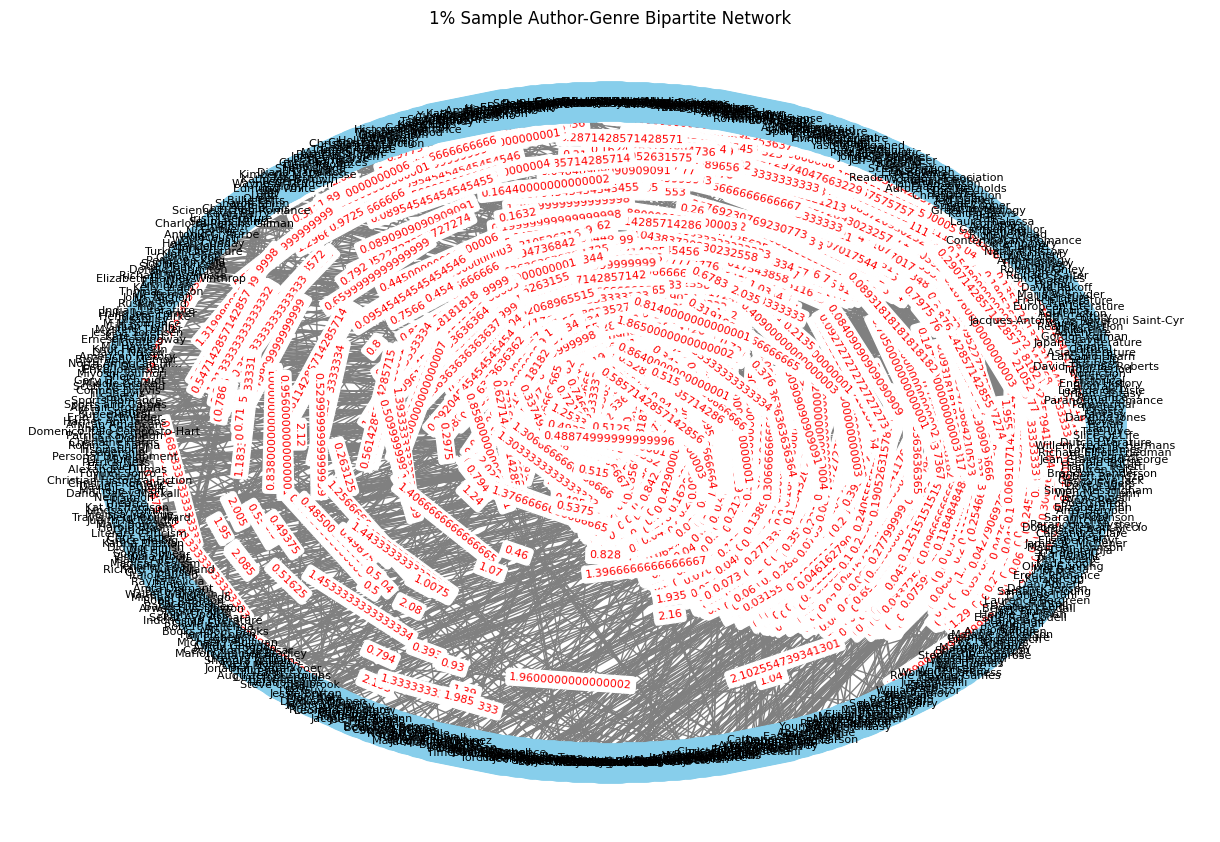

In [13]:
# Visualize the sample bipartite graph

pos = nx.circular_layout(B_1_sample)

plt.figure(figsize=(12, 8))
nx.draw(B_1_sample, pos, with_labels=True, font_size=8, font_color='black', node_color='skyblue', edge_color='gray', node_size=800)

# Display weights on edges (optional)
edge_labels = {(i, j): B_1_sample[i][j]['weight'] for i, j in B_1_sample.edges}
nx.draw_networkx_edge_labels(B_1_sample, pos, edge_labels=edge_labels, font_color='red', font_size=8)

plt.title("1% Sample Author-Genre Bipartite Network")
plt.show()

In [ ]:
# Create a 50% bipartite graph
random.seed(100)  # for reproducibility
selected_rows = random.sample(range(len(df)), int(0.5 * len(df)))
df_50 = df.iloc[selected_rows]
B = nx.Graph()

# Add nodes and edges to the bipartite graph with weights
for index,row in df_50.iterrows():
    print(index)
    genres = row['genres'].split(",")
    # print(genres)
    for genre in genres:
        # print(genre)
        # Add nodes for authors and genres
        B.add_node(row['book_authors'], bipartite=0)
        B.add_node(genre, bipartite=1)
        print("Author: ", row['book_authors'], ", Genre: ", genre)

        # Calculate weights based on specified metrics
        weighted_ratings = df_50[(df_50['book_authors'] == row['book_authors']) & (df_50['genres'].apply(lambda x: genre in x.split(",")))]['book_rating']
        print("\nWeighted Ratings: ")
        print(weighted_ratings)
        weights = df_50[(df_50['book_authors'] == row['book_authors']) & (df_50['genres'].apply(lambda x: genre in x.split(",")))][['book_rating_count', 'book_review_count']].mean(axis=1)
        print("\nWeights: ")
        print(weights)
        # Calculate weighted mean
        weighted_mean_ratings = (weighted_ratings * weights).sum() / weights.sum()
        print("\nWeighted mean rating: ", weighted_mean_ratings)

        author_genre_probability = len(df_50[(df_50['book_authors'] == row['book_authors']) & (df_50['genres'].apply(lambda x: genre in x.split(",")))]) / len(df_50[df_50['book_authors'] == row['book_authors']])
        print("\nAGP: ", author_genre_probability)
        genre_author_probability = len(df_50[(df_50['book_authors'] == row['book_authors']) & (df_50['genres'].apply(lambda x: genre in x.split(",")))]) / len(df_50[df_50['genres'].apply(lambda x: genre in x.split(","))])
        print("GAP: ", genre_author_probability)
        # Calculate joint probability
        joint_probability = author_genre_probability * genre_author_probability
        print("Joint: ", joint_probability)

        # Calculate the product of 'joint_probability' and 'weighted_mean_ratings'
        joint_weight = joint_probability * weighted_mean_ratings

        # Add the edge with the calculated weight
        B.add_edge(row['book_authors'], genre, weight=joint_weight)
        print("Join weight: ", joint_weight, "\n\n")
        

In [ ]:
for edge in B.edges:
    print(edge, ":", B.get_edge_data(edge[0],edge[1]))


In [ ]:
# write the graph to use in other modules
with open('author_genre_bipartite.gpickle','wb') as f:
    pickle.dump(B, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
# Visualize the bipartite graph
pos = nx.circular_layout(B)

plt.figure(figsize=(12, 8))
nx.draw(B, pos, with_labels=True, font_size=8, font_color='black', node_color='skyblue', edge_color='gray', node_size=800)

# Display weights on edges (optional)
edge_labels = {(i, j): B[i][j]['weight'] for i, j in B.edges}
nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels, font_color='red', font_size=8)

plt.title("50% Author-Genre Bipartite Network with Weights")
plt.show()  

